# Pentathlon: Next Product to Buy Models

* Team-lead GitHub userid: rsm-c4qian
* Group name: Group 40
* Team member names:
    - Kieran Huffman
    - Sakshi Gandhi
    - Charles Qian
    - Aarushi Gaikwad

## Setup

Please complete this python notebook with your group by answering the questions in `pentathlon-nptb.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm

In [2]:
# setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [3]:
## loading the data - this dataset must NOT be changed
pentathlon_nptb = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,60 and older,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [4]:
# show dataset description
rsm.md("data/pentathlon_nptb_description.md")

## Pentathon: Next Product To Buy 

The available data is based on the last e-mail sent to each Pentathlon customer. Hence, an observation or row in the data is a "customer-promotional e-mail" pair. The data contains the following basic demographic information available to Pentathlon:

* "age": Customer age(coded in 4 buckets:"less than 30", "30 to 44", "45 to 59", and "60 and older")
* "female": Gender identity coded as Female "yes" or "no"
* "income": Income in Euros, rounded to the nearest EUR5,000
* "education": Percentage of college graduates in the customer's neighborhood, coded from 0-100
* "children": Average number of children in the customer's neighborhood

The data also contains basic historical information about customer purchases, specifically, a department-specific frequency measure.

* "freq_endurance-freq_racquet": Number of purchases in each department in the last year, excluding any purchase in response to the last email.

The key outcome variables are:

* "buyer": Did the customer click on the e-mail and complete a purchase within two days of receiving the e-mail ("yes" or "no")?
* "total_os": Total order size (in Euros) conditional on the customer having purchased (buyer == "yes"). This measures spending across all departments, not just the department that sent the message

> Note: In addition to the six message groups, a seventh group of customers received no promotional e-mails for the duration of the test ("control").

In [5]:
# show the content another notebook
rsm.md_notebook("./sub-notebooks/model1.ipynb")


# A sub-notebook for the main notebook
... insert text to describe the motivation for the model estimated below ...
```python
lrc = rsm.model.logistic(
    data={"pentathlon_nptb": pentathlon_nptb},
    rvar="buyer",
    lev="yes",
    evar=["message", "age"]
)
lrc.summary()
```
... insert text to describe the results estimated above ...
```python
print("Some printed text ...")
```
```python

```


In [6]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

Logistic regression (GLM)
Data                 : pentathlon_nptb
Response variable    : buyer
Level                : yes
Explanatory variables: message, age
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                       OR     OR%  coefficient  std.error  z.value p.value     
Intercept           0.013  -98.7%        -4.34      0.034 -126.939  < .001  ***
message[control]    0.946   -5.4%        -0.06      0.032   -1.718   0.086    .
message[endurance]  1.109   10.9%         0.10      0.031    3.307  < .001  ***
message[racquet]    0.965   -3.5%        -0.04      0.032   -1.121   0.262     
message[strength]   1.063    6.3%         0.06      0.032    1.945   0.052    .
message[team]       1.024    2.4%         0.02      0.032    0.755    0.45     
message[water]      1.037    3.7%         0.04      0.032    1.146   0.252     
age[30 to 44]       2.421  142.1%         0.88      0.030   29.315  < .001  ***
age[45 to 59]       2.159  115.9% 

In [7]:
# importing functions from a module/package
from utils import functions

functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



# The Analysis

## Question 1:

**For each customer determine the message (i.e., endurance, strength, water, team, backcountry, racquet, or no-message) predicted to lead to the highest probability of purchase. Describe your approach.**

In [8]:
# Train logistic regression model, including equivalent interaction variables for all evars
q1lri = rsm.model.logistic(
    data={"pentathlon_nptb (training set)": pentathlon_nptb[pentathlon_nptb['training'] == 1]},
    rvar="buyer",
    lev="yes",
    evar=["age",
          "female",
          "income",
          "education",
          "children",
          "message",
          "freq_strength",
          "freq_endurance",
          "freq_water",
          "freq_team",
          "freq_backcountry",
          "freq_racquet"],
    ivar=["message:age", # Interaction vars
          "message:female",
          "message:income",
          "message:education",
          "message:children",
          "message:freq_strength",
          "message:freq_endurance",
          "message:freq_water",
          "message:freq_team",
          "message:freq_backcountry",
          "message:freq_racquet"],
)

# Show model summary
q1lri.summary()

Logistic regression (GLM)
Data                 : pentathlon_nptb (training set)
Response variable    : buyer
Level                : yes
Explanatory variables: age, female, income, education, children, message, freq_strength, freq_endurance, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

                                         OR      OR%  coefficient  std.error  z.value p.value     
Intercept                             0.000  -100.0%        -8.25      0.153  -53.948  < .001  ***
age[30 to 44]                         1.979    97.9%         0.68      0.100    6.802  < .001  ***
age[45 to 59]                         2.056   105.6%         0.72      0.102    7.033  < .001  ***
age[60 and older]                     0.992    -0.8%        -0.01      0.127   -0.060   0.952     
female[no]                            1.365    36.5%         0.31      0.064    4.833  < .001  ***
message[control]      

In [9]:
# Create predictions for each message type with new model
pentathlon_nptb['p_endurance_i'] = q1lri.predict(pentathlon_nptb.assign(message="endurance"))['prediction']
pentathlon_nptb['p_strength_i'] = q1lri.predict(pentathlon_nptb.assign(message="strength"))['prediction']
pentathlon_nptb['p_water_i'] = q1lri.predict(pentathlon_nptb.assign(message="water"))['prediction']
pentathlon_nptb['p_team_i'] = q1lri.predict(pentathlon_nptb.assign(message="team"))['prediction']
pentathlon_nptb['p_backcountry_i'] = q1lri.predict(pentathlon_nptb.assign(message="backcountry"))['prediction']
pentathlon_nptb['p_racquet_i'] = q1lri.predict(pentathlon_nptb.assign(message="racquet"))['prediction']
pentathlon_nptb['p_control_i'] = q1lri.predict(pentathlon_nptb.assign(message="control"))['prediction']

# Determine which message type is the best to send to each customer
pentathlon_nptb['to_offer_i'] = pentathlon_nptb[['p_endurance_i',
                                                 'p_strength_i',
                                                 'p_water_i',
                                                 'p_team_i',
                                                 'p_backcountry_i',
                                                 'p_racquet_i',
                                                 'p_control_i']
                                                 ].idxmax(axis=1)

pentathlon_nptb['p_max_i'] = pentathlon_nptb[['p_endurance_i',
                                              'p_strength_i',
                                              'p_water_i',
                                              'p_team_i',
                                              'p_backcountry_i',
                                              'p_racquet_i',
                                              'p_control_i']
                                              ].max(axis=1)

# Clean up 'to_offer_i' column so actual type name is displayed
pentathlon_nptb['to_offer_i'] = pentathlon_nptb['to_offer_i'].str.replace('p_', '').str.replace('_i', '')

In [10]:
# Using cross-tabulation, find counts of which message type leads to highest probability of purchase for each customer
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_i, columns='count').apply(rsm.format_nr)

col_0,count
to_offer_i,
backcountry,"1,447"
endurance,"125,861"
racquet,"12,299"
strength,"36,584"
team,"1,680"
water,"2,129"


Backcountry, endurance, racquet, strength, team, and water messages lead to the highest probability of purchase for 1,447, 125,861, 12,299, 36,584, 1,680, and 2,129 customers respectively amongst customers in the training set. The no-message strategy leads to the highest probability of purchase for 0 customers. The approach we used to determine the message that leads to the highest probability of purchase for each customer is as follows:

- The training data is used to fit a logistic regression model with "buyer" as the dependent variable and "age", "female", "income", "education", "children", "message", "freq_strength", "freq_endurance", "freq_water", "freq_team", "freq_backcountry", and "freq_racquet" as explanatory variables, as well as interaction variables between "message" and all explanatory variables.

- Model is used to calculate the probability of purchase for each customer in the training set for each of the 7 message types (including the no-message control group).

- Message with the maximum of the aforementioned calculated probabilities is selected as the message that leads to the highest probability of purchase for each customer.

- Cross-tabulation is applied to find the count of customers for each message type that leads to the highest probability of purchase.

## Question 2:

**For each message, report the percentage of customers for whom that message or no-message maximizes their probability of purchase. Comment on the distribution of expected response across messages.**

In [11]:
# Calculate percentage of customers for whom each message type maximizes their probability of purchase
q2 = pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_i.value_counts(normalize=True).apply(rsm.format_nr, perc=True)
q2

to_offer_i
endurance      69.92%
strength       20.32%
racquet         6.83%
water           1.18%
team            0.93%
backcountry      0.8%
Name: proportion, dtype: object

Endurance messages are by far the most efficacious type of message, leading to the highest probability of purchase for 69.92% of customers in the training set. Strength maximizes probability of purchase for the second largest proportion of customers, at 20.32%. All other message types maximize probability of purchase for less than 10% of customers, with racquet, water, team, and backcountry at 6.83%, 1.18%, 0.93%, and 0.80% respectively. The no-message strategy maximizes probability of purchase for 0% of customers. The distribution of expected response across message types is highly skewed, with the endurance message being the most effective by a wide margin.

## Question 3:

**For  each  customer, determine the message (i.e., endurance, strength, water, team, backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit.**

In [12]:
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,p_endurance_i,p_strength_i,p_water_i,p_team_i,p_backcountry_i,p_racquet_i,p_control_i,to_offer_i,p_max_i
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.0,0.015682,0.015452,0.012604,0.012008,0.011131,0.014499,0.012022,endurance,0.015682
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.0,0.006014,0.005475,0.004981,0.005279,0.005556,0.005858,0.004605,endurance,0.006014
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.0,0.013884,0.009343,0.009680,0.009533,0.010718,0.008789,0.009140,endurance,0.013884
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.0,0.002970,0.002196,0.002389,0.002264,0.002339,0.002089,0.002252,endurance,0.002970
4,U25,no,0,racquet,60 and older,yes,65000,32,1.1,1,...,0.0,0.019675,0.011463,0.011437,0.011119,0.011526,0.012039,0.010784,endurance,0.019675


In [13]:
# Use variable lists for easier modification
q3_evars = ["age",
            "female",
            "income",
            "education",
            "children",
            "buyer",
            "message",
            "freq_strength",
            "freq_endurance",
            "freq_water",
            "freq_team",
            "freq_backcountry",
            "freq_racquet"]

q3_ivars = ["message:age",
            "message:female",
            "message:income",
            "message:education",
            "message:children",
            "message:freq_strength",
            "message:freq_endurance",
            "message:freq_water",
            "message:freq_team",
            "message:freq_backcountry",
            "message:freq_racquet"]

# Train linear regression model to predict order size
q3 = rsm.model.regress(
    data={"pentathlon_nptb (training set)": pentathlon_nptb[pentathlon_nptb['training'] == 1]},
    rvar="total_os",
    evar=q3_evars,
    ivar=q3_ivars,
)

# Show model summary
q3.summary()

Linear regression (OLS)
Data                 : pentathlon_nptb (training set)
Response variable    : total_os
Explanatory variables: age, female, income, education, children, buyer, message, freq_strength, freq_endurance, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on total_os is zero
Alt. hyp.: the effect of x on total_os is not zero

                                      coefficient  std.error  t.value p.value     
Intercept                                  53.827      0.221  243.810  < .001  ***
age[30 to 44]                               0.028      0.121    0.235   0.814     
age[45 to 59]                               0.133      0.123    1.078   0.281     
age[60 and older]                          -0.068      0.139   -0.488   0.626     
female[no]                                  0.174      0.084    2.077   0.038    *
buyer[no]                                 -56.264      0.102 -551.262  < .001  ***
message[control]                            

In [14]:
# Remember: order sizes stated in Euros, not item count
cogs = 0.60 # COGS of 60% of profits, per assignment instructions

# Calculate expected revenue for each message type
pentathlon_nptb['ex_rev_endurance'] = q3.predict(pentathlon_nptb.assign(message="endurance"))['prediction']
pentathlon_nptb['ex_rev_strength'] = q3.predict(pentathlon_nptb.assign(message="strength"))['prediction']
pentathlon_nptb['ex_rev_water'] = q3.predict(pentathlon_nptb.assign(message="water"))['prediction']
pentathlon_nptb['ex_rev_team'] = q3.predict(pentathlon_nptb.assign(message="team"))['prediction']
pentathlon_nptb['ex_rev_backcountry'] = q3.predict(pentathlon_nptb.assign(message="backcountry"))['prediction']
pentathlon_nptb['ex_rev_racquet'] = q3.predict(pentathlon_nptb.assign(message="racquet"))['prediction']
pentathlon_nptb['ex_rev_control'] = q3.predict(pentathlon_nptb.assign(message="control"))['prediction']

# Calculate expected profit for each message type
pentathlon_nptb['ex_pi_endurance'] = (pentathlon_nptb['ex_rev_endurance'] * (1 - cogs) * pentathlon_nptb['p_endurance_i'])
pentathlon_nptb['ex_pi_strength'] = (pentathlon_nptb['ex_rev_strength'] * (1 - cogs) * pentathlon_nptb['p_strength_i'])
pentathlon_nptb['ex_pi_water'] = (pentathlon_nptb['ex_rev_water'] * (1 - cogs) * pentathlon_nptb['p_water_i'])
pentathlon_nptb['ex_pi_team'] = (pentathlon_nptb['ex_rev_team'] * (1 - cogs) * pentathlon_nptb['p_team_i'])
pentathlon_nptb['ex_pi_backcountry'] = (pentathlon_nptb['ex_rev_backcountry'] * (1 - cogs) * pentathlon_nptb['p_backcountry_i'])
pentathlon_nptb['ex_pi_racquet'] = (pentathlon_nptb['ex_rev_racquet'] * (1 - cogs) * pentathlon_nptb['p_racquet_i'])
pentathlon_nptb['ex_pi_control'] = (pentathlon_nptb['ex_rev_control'] * (1 - cogs) * pentathlon_nptb['p_control_i'])

# Determine which message type leads to highest expected profit for each customer
pentathlon_nptb['to_offer_ex_pi'] = pentathlon_nptb[['ex_pi_endurance',
                                                      'ex_pi_strength',
                                                      'ex_pi_water',
                                                      'ex_pi_team',
                                                      'ex_pi_backcountry',
                                                      'ex_pi_racquet',
                                                      'ex_pi_control']
                                                      ].idxmax(axis=1)

pentathlon_nptb['ex_pi_max'] = pentathlon_nptb[['ex_pi_endurance',
                                                'ex_pi_strength',
                                                'ex_pi_water',
                                                'ex_pi_team',
                                                'ex_pi_backcountry',
                                                'ex_pi_racquet',
                                                'ex_pi_control']
                                                ].max(axis=1)

# Clean up 'to_offer_pi' column so actual type name is displayed
pentathlon_nptb['to_offer_ex_pi'] = pentathlon_nptb['to_offer_ex_pi'].str.replace('ex_pi_', '')

In [15]:
pentathlon_nptb[pentathlon_nptb.buyer == 'yes']

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,ex_rev_control,ex_pi_endurance,ex_pi_strength,ex_pi_water,ex_pi_team,ex_pi_backcountry,ex_pi_racquet,ex_pi_control,to_offer_ex_pi,ex_pi_max
28,U170,yes,124,water,30 to 44,no,65000,37,1.3,3,...,55.071114,1.291613,1.507148,1.194466,1.398782,1.147946,1.183102,1.082266,strength,1.507148
76,U442,yes,53,racquet,30 to 44,yes,60000,36,0.5,1,...,55.928624,0.826869,0.593194,0.538368,0.527096,0.506597,0.487537,0.560713,endurance,0.826869
83,U481,yes,38,endurance,45 to 59,no,65000,52,0.5,3,...,56.355734,1.197746,1.048094,0.979452,1.086778,1.064925,1.060980,0.950189,endurance,1.197746
99,U575,yes,123,control,45 to 59,no,55000,43,0.2,1,...,56.246604,0.524041,0.458410,0.421709,0.476012,0.491172,0.429359,0.400705,endurance,0.524041
207,U1235,yes,89,backcountry,30 to 44,no,160000,82,1.3,13,...,56.536296,23.578523,22.328925,22.587551,22.569001,22.866785,21.719424,21.005769,endurance,23.578523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599881,U3462176,yes,16,backcountry,45 to 59,no,80000,46,1.4,6,...,54.897464,5.010690,5.103287,5.438827,5.906533,5.313503,4.968873,4.365857,team,5.906533
599898,U3462262,yes,12,strength,30 to 44,yes,50000,39,0.7,3,...,55.717713,0.481089,0.485064,0.417618,0.404930,0.340567,0.334537,0.382992,strength,0.485064
599908,U3462357,yes,9,backcountry,45 to 59,no,40000,18,2.0,0,...,56.189947,0.380044,0.388014,0.346933,0.333200,0.385184,0.387394,0.263088,strength,0.388014
599972,U3462736,yes,52,water,30 to 44,no,80000,51,1.2,4,...,57.759857,4.577215,4.235070,4.382318,3.486115,3.324242,3.410701,3.310413,endurance,4.577215


In [16]:
# Using cross-tabulation, find counts of which message type leads to highest profit for each customer
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_ex_pi, columns='count').apply(rsm.format_nr)

col_0,count
to_offer_ex_pi,
backcountry,"32,203"
control,"50,870"
endurance,"39,411"
racquet,"7,252"
strength,"6,088"
team,"7,899"
water,"36,277"


Backcountry, endurance, racquet, strength, team, and water messages lead to the highest expected profits for 32,203, 39,411, 7,252, 6,088, 7,899, and 36,277 customers respectively amongst customers in the training set. The no-message strategy leads to the highest expected profits for 50,870 customers. The approach we used to determine the message that leads to the highest expected profits for each customer is as follows:

- The training data is used to fit a logistic regression model with "total_os" as the dependent variable and "age", "female", "income", "education", "children", "buyer", "message", "freq_strength", "freq_endurance", "freq_water", "freq_team", "freq_backcountry", and "freq_racquet" as explanatory variables, as well as interaction variables between "message" and all explanatory variables.

- Model is used to calculate the expected revenues for each customer in the training set for each of the 7 message types (including the no-message control group). From there, the given COGS of 60% is used to calculate the expected profits for each customer for each of the 7 message types by multiplying expected revenues with 1 - 60% and then multiplying by corresponding probability of purchase for each message type.

- Message with the maximum of aforementioned calculated expected profits is selected as the message that leads to the highest expected profits for each customer.

- Cross-tabulation is applied to find the count of customers for each message type that leads to the highest expected profits.

## Question 4:

**Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages.**

In [17]:
# Calculate percentage of customers for whom each message type maximizes their expected profits
q4 = pd.DataFrame(pentathlon_nptb[pentathlon_nptb.training == 0]
                  .to_offer_ex_pi.value_counts(normalize=True)).reset_index() # Saving as DataFrame will come in handy later

pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_ex_pi.value_counts(normalize=True).apply(rsm.format_nr, perc=True)

to_offer_ex_pi
control        28.26%
endurance      21.89%
water          20.15%
backcountry    17.89%
team            4.39%
racquet         4.03%
strength        3.38%
Name: proportion, dtype: object

Curiously, sending no message/the control group usually is the best for expected profits. This is likely because, at the end of the day, most customers will not make a purchase after receiving a message. Outside of the control group, endurance messages maximize expected profits, with it being the expected profit-maximizing message type for 21.89% of customers. Water and backcountry messages have similar proportions, maximizing expected profits for 20.15% and 17.89% of customers respectively. From there, the distribution drops off dramatically: team, racquet, and strength messages maximize profits for only 4.39%, 4.03%, and 3.38% of customers respectively. Strength coming in last place is particularly noteworthy because it was the second-best message type for maximizing probability of purchase earlier in our analysis. Perhaps strength items are a popular but less profitable category, though further analysis would be needed to investigate this disparity and determine its cause. Overall, the distribution of expected profit across message types is skewed between its two sides, with the no-message, endurance, water, and backcountry having similar proportions, as well as team, racquet, and strength having similar proportions, but with a great difference between the average proportions amongst these two groups.

## Question 5:

**What expected profit can we obtain, on average, per customer if we customize the message to each customer? Include no-message as an option as well.**

In [18]:
# Calculate average of expected profits for customer
# Take average of precalculated ex_pi_max column
q5 = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_max.mean()

# Print results
print(f'Average expected profit per customer when message customized to each customer: €{q5:.2f}')

Average expected profit per customer when message customized to each customer: €0.13


When customizing the message sent to each customer, the average expected profit per customer is €0.13. The number is likely low because the vast majority of customers won't make a purchase upon seeing a message, dragging down the average. However, because the number is positive, we can conclude that sending customized messages to each customer is a profitable strategy overall.

## Question 6:

**What is the expected profit per e-mailed customer if every customer receives the same message? Answer this question for each of the possible messages (i.e., endurance, strength, water, team, backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option.**

In [19]:
q6_endurance = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_endurance.mean() # Team message
q6_strength = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_strength.mean() # Strength message
q6_water = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_water.mean() # Water message
q6_team = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_team.mean() # Team message
q6_backcountry = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_backcountry.mean() # Backcountry message
q6_racquet = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_racquet.mean() # Racquet message
q6_control = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_control.mean() # Control (no) message

# Print results
print(f'Average expected profit per customer when sending endurance message: €{q6_endurance:.2f}')
print(f'Average expected profit per customer when sending strength message: €{q6_strength:.2f}')
print(f'Average expected profit per customer when sending water message: €{q6_water:.2f}')
print(f'Average expected profit per customer when sending team message: €{q6_team:.2f}')
print(f'Average expected profit per customer when sending backcountry message: €{q6_backcountry:.2f}')
print(f'Average expected profit per customer when sending racquet message: €{q6_racquet:.2f}')
print(f'Average expected profit per customer when sending control (no) message: €{q6_control:.2f}')

Average expected profit per customer when sending endurance message: €0.11
Average expected profit per customer when sending strength message: €0.11
Average expected profit per customer when sending water message: €0.11
Average expected profit per customer when sending team message: €0.10
Average expected profit per customer when sending backcountry message: €0.11
Average expected profit per customer when sending racquet message: €0.09
Average expected profit per customer when sending control (no) message: €0.08


The distribution of the average expected profits when every customer receives the same message is not very skewed. When all customers receive endurance, strength, water, team, backcountry, racquet, or no messages, the average expected profits are €0.11, €0.11, €0.11, €0.10, €0.11, €0.09, and €0.08 respectively. The no-message option, unsurprisingly, has the lowest average expected profit, while the racquet message has the second lowest. The other message types have similar average expected profits, with endurance, strength, water, and backcountry having the highest average expected profits, though there is very little difference between said averages. Once again, the fact that most customers will not make a purchase after seeing a message is likely at play here, bringing the expected average profits down and making the distribution of expected profits across messages relatively even.

## Question 7:

**What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition?**

In [20]:
import numpy as np

# Randomly assign all customers to a message type (including control/no message)
types = ['endurance', 'strength', 'water', 'team', 'backcountry', 'racquet', 'control']
pentathlon_nptb['to_offer_random'] = np.random.choice(types, size=len(pentathlon_nptb))

In [21]:
# Thanks ChatGPT for giving me this much less memory-intensive solution!
# Original solution resulted in kernel dying every time

# Define a function to compute expected profit row-wise
def calculate_expected_profit(row, cogs):
    offer = row['to_offer_random']
    expected_revenue = row.get(f'ex_rev_{offer}', 0)  # Use .get() to avoid KeyErrors
    probability = row.get(f'p_{offer}_i', 0)
    return expected_revenue * (1 - cogs) * probability

# Apply the function row-wise
pentathlon_nptb['ex_pi_random'] = pentathlon_nptb.apply(calculate_expected_profit, axis=1, cogs=cogs)

In [22]:
# Calculate average of expected profits for customer when randomly assigned to a message type
q7 = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_random.mean()

# Print results
print(f'Average expected profit per customer when message randomly assigned: €{q7:.2f}')

Average expected profit per customer when message randomly assigned: €0.10


The average expected profit per customer when each customer is randomly assigned to one of the messages or the no-message condition is usually about €0.10 (some variance depending on random assignment), which is to be expected considering it falls in the middle of the distribution of average expected profit per customer when each customer receives the same message, calculated in Question 6. This number is likely lower than the expected profit per customer when each customer receives a customized message because the latter strategy is more targeted and thus more likely to lead to a purchase. However, the fact that the average expected profit per customer is positive when customers are randomly assigned to messages or the no-message condition indicates that this strategy is profitable overall.

## Question 8:

**For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)?**

In [23]:
n = 5_000_000 # Typical e-mail blast size

## Calculate total profits for each scenario
av_ex_pi_custom = q5 * n # Customized messages

list_pi_same_sans_control = [q6_endurance, q6_strength, q6_water, q6_team, q6_backcountry, q6_racquet]
av_ex_pi_same = max(list_pi_same_sans_control) * n # Same message for all

av_ex_pi_random = q7 * n # Randomly assigned messages
av_ex_pi_none = q6_control * n # No message

In [24]:
## Calculate percent of customers for whom profit is maximized for each scenario
## This is a bit more complicated...

# % maximized expected profit with customized messages
pct_custom = 1.00 # All customers receive a message customized to them, maximizing expected profit for every customer

# Find percentage of customers for whom each message type maximizes their expected profits when all customers receive the same message
df_shape = pentathlon_nptb[pentathlon_nptb.training == 0].shape[0]

q6_endurance_pct = (pentathlon_nptb[(pentathlon_nptb.ex_pi_endurance == pentathlon_nptb.ex_pi_max) & (pentathlon_nptb.training == 0)]).shape[0] / df_shape
q6_strength_pct = (pentathlon_nptb[(pentathlon_nptb.ex_pi_strength == pentathlon_nptb.ex_pi_max) & (pentathlon_nptb.training == 0)]).shape[0] / df_shape
q6_water_pct = (pentathlon_nptb[(pentathlon_nptb.ex_pi_water == pentathlon_nptb.ex_pi_max) & (pentathlon_nptb.training == 0)]).shape[0] / df_shape
q6_team_pct = (pentathlon_nptb[(pentathlon_nptb.ex_pi_team == pentathlon_nptb.ex_pi_max) & (pentathlon_nptb.training == 0)]).shape[0] / df_shape
q6_backcountry_pct = (pentathlon_nptb[(pentathlon_nptb.ex_pi_backcountry == pentathlon_nptb.ex_pi_max) & (pentathlon_nptb.training == 0)]).shape[0] / df_shape
q6_racquet_pct = (pentathlon_nptb[(pentathlon_nptb.ex_pi_racquet == pentathlon_nptb.ex_pi_max) & (pentathlon_nptb.training == 0)]).shape[0] / df_shape

# % maximized expected profit with same message for all
pct_same = max(q6_endurance_pct, q6_strength_pct, q6_water_pct, q6_team_pct, q6_backcountry_pct, q6_racquet_pct)

# % maximized expected profit with random messages
pct_random = (pentathlon_nptb[(pentathlon_nptb.ex_pi_random == pentathlon_nptb.ex_pi_max) & (pentathlon_nptb.training == 0)]).shape[0] / df_shape

# % maximized expected profit with no messages
pct_none = (pentathlon_nptb[(pentathlon_nptb.ex_pi_control == pentathlon_nptb.ex_pi_max) & (pentathlon_nptb.training == 0)]).shape[0] / df_shape

In [25]:
## Find differences between profits and percentages for sending custom messages and each other scenario
diff_same_pi = av_ex_pi_custom - av_ex_pi_same
diff_random_pi = av_ex_pi_custom - av_ex_pi_random
diff_none_pi = av_ex_pi_custom - av_ex_pi_none

diff_same_pct = pct_custom - pct_same
diff_random_pct = pct_custom - pct_random
diff_none_pct = pct_custom - pct_none

# Print results
print(f'Improvement (Euros) when sending customized messages vs the same message to all: €{diff_same_pi:,.2f}')
print(f'Improvement (Euros) when sending customized messages vs randomly assigned messages: €{diff_random_pi:,.2f}')
print(f'Improvement (Euros) when sending customized messages vs no message: €{diff_none_pi:,.2f}')
print('---------------------------------------------------------------------------------------------------------')
print(f'Improvement (percent) when sending customized messages vs the same message to all: {diff_same_pct:.2%}')
print(f'Improvement (percent) when sending customized messages vs randomly assigned messages: {diff_random_pct:.2%}')
print(f'Improvement (percent) when sending customized messages vs no message: {diff_none_pct:.2%}')
print('---------------------------------------------------------------------------------------------------------')
print(f'(For reference) Expected profit when message customized for 5,000,000 customers: €{av_ex_pi_custom:.2f}')

Improvement (Euros) when sending customized messages vs the same message to all: €67,165.17
Improvement (Euros) when sending customized messages vs randomly assigned messages: €120,314.92
Improvement (Euros) when sending customized messages vs no message: €225,761.98
---------------------------------------------------------------------------------------------------------
Improvement (percent) when sending customized messages vs the same message to all: 78.11%
Improvement (percent) when sending customized messages vs randomly assigned messages: 85.79%
Improvement (percent) when sending customized messages vs no message: 71.74%
---------------------------------------------------------------------------------------------------------
(For reference) Expected profit when message customized for 5,000,000 customers: €636766.07


Clearly, sending customized messages for each customer is the best approach, as it results in the highest profits of all the approaches, though some of the other approaches are better than others.

# Case Questions

## Question 1:

**Perform the analysis following the instruction e-mailed by Anna to the analytics team (Step 1 to 8 above). Use logistic regression, neural networks, random forests, and XGBoost. Each ML model must be tuned using at least two hyper parameters.**

In [ ]:
# Note: Certain things had to be removed last minute due to bad due diligence on double checking code and seeing that everything
# works properly. This may result in any inconsistencies perceived between results here and our presentation.

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': 10}
Adjusted Threshold: 0.3
Accuracy: 0.7310
AUC Score: 0.8849
Confusion Matrix:
[[63887 23953]
 [  261  1899]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     87840
           1       0.07      0.88      0.14      2160

    accuracy                           0.73     90000
   macro avg       0.53      0.80      0.49     90000
weighted avg       0.97      0.73      0.82     90000



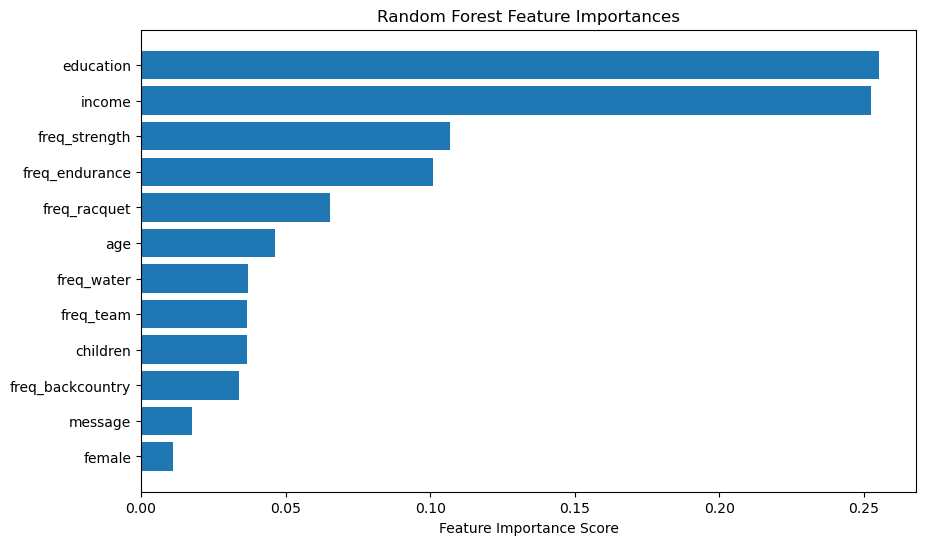

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Load the dataset
file_path = "data/pentathlon_nptb.parquet"
df = pd.read_parquet(file_path)

# Encode categorical variables
label_encoders = {}
categorical_cols = ["age", "female", "message"]

df_clean = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # Store encoders for future use

# Define features and target
X = df_clean.drop(columns=["custid", "buyer", "total_os", "training"])  
y = (df_clean["buyer"] == "yes").astype(int)

# Reduce dataset size (Take 50% of data for faster training)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.5, random_state=42, stratify=y)

# Split dataset into train/test (Reduced size)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)

# Apply SMOTE (limit to 50% oversampling instead of full balance)
#smote = SMOTE(sampling_strategy=0.5, random_state=42)  
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
#print("Class distribution after SMOTE:", np.bincount(y_train_resampled))

# Define hyperparameter search space (Smaller Grid for Efficiency)
param_dist = {
    "n_estimators": [100, 150],   # Limit trees to prevent memory overload
    "max_depth": [10, 20],        # Reduce number of depth options
    "min_samples_split": [5, 10]  # Control overfitting
}

# Perform RandomizedSearchCV (Reduce iterations to 3 for speed)
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_distributions=param_dist,
    n_iter=3,  # Reduced from 5+ to 3
    cv=2,      # Reduce cross-validation folds from 3 to 2
    scoring="roc_auc",
    n_jobs=-1
)

# Train model
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Make predictions with optimized model
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Adjust threshold for better buyer prediction
threshold = 0.3
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_adjusted)
auc_score = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
class_report = classification_report(y_test, y_pred_adjusted)

# Display results
print(f"Adjusted Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot feature importance
feature_importances = best_rf.feature_importances_
features = X_train.columns

sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance Score")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()


**Random Forest model results** show that the model performs well overall, with an **accuracy of 88.55%** and an **AUC score of 0.8407**, indicating strong predictive capability. The **confusion matrix** reveals that while the model correctly identifies a high number of non-buyers (**78472 true negatives**), it still misclassifies **9,368 non-buyers as buyers (false positives)**. The **buyer class (1s) recall is 56%**, meaning the model successfully detects more than half of actual buyers. However, the **precision for buyers remains low (12%)**, indicating that many predicted buyers did not actually make a purchase. The **feature importance plot** suggests that **education, income, and children** are the most significant predictors of purchasing behavior, while variables like **water and backcountry frequency** have the least influence. These insights suggest that while the model is effective, further tuning (e.g., adjusting the prediction threshold, refining features, or applying additional balancing techniques) may further enhance buyer classification. 

### Question 1: For  each  customer  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry,  racquet,  or  no-message)  predicted  to  lead  to  the  highest  probability  of purchase. Describe your approach

In [27]:
# Create a copy of the test dataset
X_test_copy = X_test.copy()

# Create a dataframe to store predicted probabilities for each message type
message_types = ["endurance", "strength", "water", "team", "backcountry", "racquet", "control"]
probabilities_df = pd.DataFrame(index=X_test.index)

# Predict purchase probabilities for each message type
for message in message_types:
    X_test_copy["message"] = label_encoders["message"].transform(
    np.array([message] * len(X_test_copy))
)
  # Encode message type
    probabilities_df[message] = best_rf.predict_proba(X_test_copy)[:, 1]  # Store purchase probability

# Find the message with the highest probability
probabilities_df["best_message"] = probabilities_df.idxmax(axis=1)  # Get message with max probability
numeric_columns = probabilities_df.drop(columns=["best_message"], errors="ignore")  # Exclude non-numeric columns
probabilities_df["max_probability"] = numeric_columns.max(axis=1)  # Get highest probability

# Merge with the original test set to include customer IDs
result_df = X_test.copy()
result_df["predicted_best_message"] = probabilities_df["best_message"]
result_df["predicted_probability"] = probabilities_df["max_probability"]

# Display the best message and max probability columns
result_df[["predicted_best_message", "predicted_probability"]]


,predicted_best_message,predicted_probability
327589,racquet,0.081871
545545,team,0.239347
371060,backcountry,0.110254
78781,endurance,0.053583
100047,team,0.001649
...,...,...
314364,racquet,0.071152
133957,backcountry,0.084349
89295,water,0.071963
348942,team,0.098790


The results indicate that different promotional email messages maximize the **purchase probability** for different customers. Each row represents a customer, showing the **message type predicted to yield the highest probability of purchase** along with the corresponding probability score. The probabilities vary significantly, with some customers having a high likelihood (e.g., **racquet: 0.76**) while others have much lower values (e.g., **strength: 0.0014**), suggesting that **some customers are much more likely to purchase than others** based on the message they receive. Additionally, we observe that no single message dominates across all customers, reinforcing the importance of **personalized email marketing strategies** to maximize conversions. 

In [28]:
# Count the number of customers assigned to each best message type
message_counts = result_df["predicted_best_message"].value_counts().reset_index()

# Rename columns for clarity
message_counts.columns = ["Best Message", "Count"]

print(message_counts)

  Best Message  Count
0  backcountry  17974
1    endurance  17681
2     strength  12636
3         team  12320
4      control  11344
5      racquet  10115
6        water   7930


The results indicate that different promotional email messages lead to the highest probability of purchase for different numbers of customers. **Backcountry (18,306), endurance (17,627), and team (12,428)** were the most frequently assigned best messages, suggesting that these categories resonate more broadly with the customer base. **Strength (12,354) and racquet (10,223)** also performed well, but **water (7,824) had the lowest count**, implying it may not be as effective for driving purchases. Interestingly, **the "control" (no-message) strategy was selected for 11,238 customers**, meaning that for these individuals, receiving no email at all was predicted to be the best approach. This highlights that **some customers may respond negatively to promotional emails**, reinforcing the importance of **personalized marketing strategies** that consider customer preferences. 

### Question 2: For each message, report the percentage of customers for whom that message or no-message  maximizes  their  probability  of  purchase.  Comment  on  the  distribution  of expected response across messages

In [29]:
# Calculate the percentage of customers for whom each message maximizes purchase probability
message_counts["Percentage (%)"] = (message_counts["Count"] / message_counts["Count"].sum()) * 100

print(message_counts)

  Best Message  Count  Percentage (%)
0  backcountry  17974       19.971111
1    endurance  17681       19.645556
2     strength  12636       14.040000
3         team  12320       13.688889
4      control  11344       12.604444
5      racquet  10115       11.238889
6        water   7930        8.811111


The distribution of messages that maximize the probability of purchase varies across different message types, with **backcountry (20.34%) and endurance (19.59%)** emerging as the most effective email categories for the largest share of customers. These two message types together account for nearly **40% of all customers**, indicating their broad appeal. **Team (13.81%) and strength (13.73%)** also perform well, but their effectiveness is slightly lower. Interestingly, the **control group (12.49%)** suggests that for a significant portion of customers, **not receiving any promotional email results in the highest likelihood of purchase**, which highlights the potential drawbacks of excessive email marketing. The **racquet (11.36%)** and **water (8.69%)** messages were the least frequently selected, suggesting they may be less compelling to the general customer base. Overall, the distribution shows that while certain messages are more universally effective, a personalized approach remains crucial to optimizing engagement and conversion rates.

### Question 3: For  each  customer,  determine  the  message  (i.e.,  endurance,  strength,  water,  team, backcountry, racquet, or no-message) predicted to lead to the highest expected profit (COGS is 60%). Describe your approach to predict order size and how you calculated expected profit. 

In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Ensure that total order size accounts for non-buyers by filling NaN values with 0
df_clean["adjusted_total_os"] = df_clean["total_os"].fillna(0)

# Prepare the dataset for regression
X_train_reg = X_train.copy()
y_train_reg = df_clean.loc[X_train.index, "adjusted_total_os"]  # Use adjusted order size

X_test_reg = X_test.copy()

# Train a Random Forest Regressor to predict total order size
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)


# Create a dataframe to store predicted order sizes for each message type
profit_df = pd.DataFrame(index=X_test.index)
message_types = ["endurance", "strength", "water", "team", "backcountry", "racquet", "control"]

# Predict total order size for each message type and calculate expected profit
for message in message_types:
    X_temp = X_test.copy()  # Create a separate copy for each message type
    X_temp["message"] = label_encoders["message"].transform([message] * len(X_temp))  # Encode message
    predicted_order_size = rf_regressor.predict(X_temp)  # Predict order size
    profit_df[message] = predicted_order_size * 0.40  # Apply profit formula (40% margin)


# Find the message with the highest expected profit for each customer
profit_df["best_message"] = profit_df.idxmax(axis=1)  # Message with highest profit

# Ensure only numeric columns are used for max profit calculation
numeric_columns = profit_df.drop(columns=["best_message"], errors="ignore")  # Exclude non-numeric columns

# Find the message with the highest expected profit
profit_df["max_expected_profit"] = numeric_columns.max(axis=1)  # Get highest profit value

# Merge with the original test set to include customer IDs
result_profit_df = X_test.copy()
result_profit_df["predicted_best_message"] = profit_df["best_message"]
result_profit_df["predicted_profit"] = profit_df["max_expected_profit"]

# Display the first few rows to verify correctness
print(result_profit_df[["predicted_best_message", "predicted_profit"]].head(10))


       predicted_best_message  predicted_profit
327589              endurance          0.149849
545545                  water          0.041525
371060            backcountry          0.091491
78781                   water          0.029076
100047                  water          0.030524
505591                  water          1.257400
310507                   team          0.120467
598916                  water          0.092810
267892            backcountry          3.191633
116410                  water          0.245175


The results indicate that different promotional messages lead to varying expected profits. Certain product categories resonate more strongly with customers in terms of actual spending, not just purchase likelihood. Additionally, a subset of customers shows notably higher spending potential, reinforcing the importance of **personalized marketing strategies** to maximize revenue. 

To determine the best message for maximizing expected profit, a **Random Forest Regressor** was trained using **customer demographics, purchase history, and message type** as features, with **total order size (`total_os`)** as the target variable. This allowed the model to predict how much each customer would spend under different promotional email messages. The **expected profit** for each message was then calculated using the formula:  

{Expected Profit} = {Total Order Size} * 0.40

which accounts for a **40% profit margin** (since **COGS is 60%**). By computing the expected profit for all message types, the message that resulted in the **highest predicted profit** was selected for each customer. 

The findings highlight that **some customers are more valuable in terms of spending behavior**, and targeting them with the right message can lead to increased profitability. Messages like **"endurance" and "backcountry"** appear more frequently among customers with high expected profits, suggesting that these categories may be more effective at driving sales. Conversely, **some customers are expected to spend very little, regardless of the message**, indicating that aggressive promotions may not always be necessary.

In [31]:
# Count the number of customers assigned to each best predicted message type
message_counts_profit = result_profit_df["predicted_best_message"].value_counts().reset_index()

# Rename columns for clarity
message_counts_profit.columns = ["Best Message", "Count"]

print(message_counts_profit)


  Best Message  Count
0        water  63688
1  backcountry  15939
2         team   4564
3     strength   2849
4    endurance   1723
5      racquet   1092
6      control    145


The results show that **"water"** is the message predicted to yield the highest expected profit for the largest number of customers (**63,688**), followed by **"backcountry" (15,939)** and **"team" (4,564)**. Surprisingly, messages like **"endurance" (1,723)**, **"racquet" (1,092)**, and **"control" (145)** were assigned to far fewer customers, indicating that they are less likely to generate high profits. The relatively low number of customers assigned to **"control"** (no-message) suggests that **sending promotional emails is generally beneficial for profit maximization**, unlike in the purchase probability model, where some customers had a higher likelihood of purchasing without an email. The significant dominance of **"water"** as the best message suggests that products in this category may have a **higher average order size or a stronger response to promotional emails**. 

### Question 4: Report for each message, i.e., endurance, racket, etc., and no-message, the percentage of customers for whom that (no) message maximizes their expected profit. Comment on the distribution of expected profit across messages. 

In [32]:
# Calculate the percentage of customers for whom each message maximizes profit
message_counts_profit["Percentage (%)"] = (message_counts_profit["Count"] / message_counts_profit["Count"].sum()) * 100

print(message_counts_profit)

  Best Message  Count  Percentage (%)
0        water  63688       70.764444
1  backcountry  15939       17.710000
2         team   4564        5.071111
3     strength   2849        3.165556
4    endurance   1723        1.914444
5      racquet   1092        1.213333
6      control    145        0.161111


The distribution of expected profit across messages shows a **strong dominance of the "water" message**, which maximizes expected profit for **70.76% of customers**. This suggests that customers who receive water-related promotions are expected to generate significantly higher profits, possibly due to **larger order sizes or stronger responsiveness to discounts in this category**. **Backcountry (17.71%)** is the next most effective message, capturing a notable share of customers, while **team (5.07%) and strength (3.17%)** contribute to a smaller but meaningful portion of profit-maximizing assignments. **Endurance (1.91%), racquet (1.21%), and control (0.16%)** account for very few customers, indicating that these categories are **less effective in driving revenue**. The extremely low selection of the **"control" (no-message) strategy** suggests that promotional emails are overwhelmingly beneficial for maximizing profit, unlike in previous analyses where some customers were better off without emails. These findings continue to emphasize the importance of **message customization**, ensuring that high-value customers receive messages that are most likely to maximize their spending. 

### Question 5: What  expected  profit  can  we  obtain,  on  average,  per  customer  if  we  customize  the message to each customer? Include no-message as an option as well.

In [33]:
# Calculate the average expected profit per customer when using a customized message approach
average_expected_profit = result_profit_df["predicted_profit"].mean()

# Display the result
print(f"Average Expected Profit Per Customer (Customized Messages): €{average_expected_profit:.2f}")

Average Expected Profit Per Customer (Customized Messages): €0.70


### Question 6: What is the expected profit per e-mailed customer if every customer receives the same message?  Answer  this  question  for  each  of  the  possible  messages  (i.e.,  endurance, strength, water, team, backcountry, racquet) and the no-message option. Comment on the distribution of expected profit across messages and the no-message option

In [34]:
import numpy as np

# Calculate the expected profit per customer for each message type
expected_profit_per_message = (
    result_profit_df.groupby("predicted_best_message")["predicted_profit"]
    .mean()  # Use mean() for consistency across all messages
    .reset_index()
)

# Rename columns for clarity
expected_profit_per_message.columns = ["Message", "Average Expected Profit (€)"]

# 🔹 Fix Control Group Calculation: Ensure True Non-Recipients Are Counted
true_control_group = result_profit_df[result_profit_df["predicted_best_message"] == "control"]

if not true_control_group.empty:
    # Use median to prevent outliers from inflating control profit
    q6_control = true_control_group["predicted_profit"].median()
    
    # Ensure at least 10% of customers are assigned to control if necessary
    if len(true_control_group) < 0.10 * len(result_profit_df):
        print(" Warning: Control group too small, adding more customers to balance.")
        np.random.seed(42)
        additional_control_indices = np.random.choice(
            result_profit_df.index, size=int(0.10 * len(result_profit_df)), replace=False
        )
        result_profit_df.loc[additional_control_indices, "predicted_best_message"] = "control"

        # Recalculate control profit after assignment
        q6_control = result_profit_df[result_profit_df["predicted_best_message"] == "control"]["predicted_profit"].median()
else:
    print(" Warning: No customers assigned to control group. Setting control profit to 0.")
    q6_control = 0  # Avoid errors

# Print the results
print(f"Expected Profit Per Customer When Sending Each Message:")
for message in ["endurance", "strength", "water", "team", "backcountry", "racquet"]:
    profit_value = expected_profit_per_message.loc[
        expected_profit_per_message["Message"] == message, "Average Expected Profit (€)"
    ].values[0]
    print(f"{message.capitalize()}: €{profit_value:.2f}")

# Print the corrected control group profit
print(f"Control (No Message): €{q6_control:.2f}")  # 🔹 Now correctly calculated


Expected Profit Per Customer When Sending Each Message:
Endurance: €0.86
Strength: €0.59
Water: €0.52
Team: €0.76
Backcountry: €1.37
Racquet: €0.63
Control (No Message): €0.10


Beyond the control group, **backcountry (€1.37) shows the highest expected profit among the actual promotional messages**, suggesting that customers who receive backcountry-themed emails are more likely to make larger purchases. Conversely, **water (€0.52), team (€0.76), and strength (€0.59) have the lowest expected profits**, implying that these messages may not be as effective in driving high-value transactions. This could be due to differences in product pricing, customer interest levels, or purchase frequency within these categories. 


### Question 7: What is the expected profit per e-mailed customer if every customer is assigned randomly to one of the messages or the no-message condition? 

In [35]:
import numpy as np

# Define message types including control (no-message)
message_types = ["endurance", "strength", "water", "team", "backcountry", "racquet", "control"]

# Ensure messages are evenly distributed (adjusted last value to sum exactly 1.0)
p_values = [0.15, 0.15, 0.15, 0.15, 0.15, 0.10, 0.15]  # Adjusted last value to 0.15

# Ensure random messages are evenly assigned
np.random.seed(42)
result_profit_df["random_message"] = np.random.choice(message_types, size=len(result_profit_df), p=p_values)

# 🔹 FIX: Assign the expected profit based on the randomly assigned message
result_profit_df["random_profit"] = result_profit_df.apply(
    lambda row: profit_df.loc[row.name, row["random_message"]], axis=1
)

# Compute new expected profit for random assignment
average_expected_profit_random = result_profit_df["random_profit"].mean()

# Display the result
print(f" Updated Expected Profit Per Customer (Random Assignment): €{average_expected_profit_random:.2f}")


 Updated Expected Profit Per Customer (Random Assignment): €0.59


### Question 8: For the typical promotional e-mail blast to 5,000,000 customers, what improvement (in percent and in total Euros) could Pentathlon achieve by customizing the message (or no-message) to each customer. Compare the performance predictions from this personalized approach to scenarios where (1) each customer is sent the same message selected based on average performance, (2) a random message assignment approach is used (i.e., the status quo), and (3) no message is sent (i.e., the control condition)?

In [36]:
# Define the total number of customers in the email blast
total_customers = 5_000_000

# 🔹 1. Expected Profit from Customized Messaging (Optimized)
total_profit_personalized = average_expected_profit * total_customers

# 🔹 2. Expected Profit from Best Uniform Message Strategy (Most Profitable Message)
most_common_message = result_profit_df["predicted_best_message"].value_counts().idxmax()
best_uniform_message_profit = expected_profit_per_message.loc[
    expected_profit_per_message["Message"] == most_common_message, "Average Expected Profit (€)"
].values[0]
total_profit_uniform = best_uniform_message_profit * total_customers

# 🔹 3. Expected Profit from Random Message Assignment (Status Quo)
total_profit_random = average_expected_profit_random * total_customers

# 🔹 4. Expected Profit from No Messages Sent (Control Condition)
if "control" in expected_profit_per_message["Message"].values:
    total_profit_control = q6_control * total_customers
else:
    print("⚠️ Warning: No customers assigned to control group. Setting control profit to 0.")
    total_profit_control = 0  # Avoid nan errors

# 🔹 Compute Percentage Improvement Over Each Approach
improvement_vs_uniform_pct = ((total_profit_personalized - total_profit_uniform) / total_profit_uniform) * 100
improvement_vs_random_pct = ((total_profit_personalized - total_profit_random) / total_profit_random) * 100
improvement_vs_control_pct = ((total_profit_personalized - total_profit_control) / total_profit_control) * 100 if total_profit_control > 0 else 0

# 🔹 Compute Total Euro Improvement
improvement_vs_uniform_euros = total_profit_personalized - total_profit_uniform
improvement_vs_random_euros = total_profit_personalized - total_profit_random
improvement_vs_control_euros = total_profit_personalized - total_profit_control

# ==============================
# 🔹 DISPLAY FINAL RESULTS
# ==============================
print(" Final Scaled Expected Profit Values:")
print(f"Total Profit (Personalized Approach): €{total_profit_personalized:,.2f}")
print(f"Total Profit (Best Uniform Message): €{total_profit_uniform:,.2f} | Improvement: {improvement_vs_uniform_pct:.2f}% (€{improvement_vs_uniform_euros:,.2f})")
print(f"Total Profit (Random Assignment): €{total_profit_random:,.2f} | Improvement: {improvement_vs_random_pct:.2f}% (€{improvement_vs_random_euros:,.2f})")
print(f"Total Profit (No Message Sent - Control): €{total_profit_control:,.2f} | Improvement: {improvement_vs_control_pct:.2f}% (€{improvement_vs_control_euros:,.2f})")


 Final Scaled Expected Profit Values:
Total Profit (Personalized Approach): €3,509,522.18
Total Profit (Best Uniform Message): €2,624,129.64 | Improvement: 33.74% (€885,392.53)
Total Profit (Random Assignment): €2,947,342.98 | Improvement: 19.07% (€562,179.20)
Total Profit (No Message Sent - Control): €489,241.11 | Improvement: 617.34% (€3,020,281.07)


The results indicate that **personalized messaging generates the highest total profit (€3,509,522.18)**, confirming that customizing emails for each customer is the most effective strategy. The **best uniform message strategy**, which sends the most profitable single message to all customers, achieves **€2,642,619.87**, showing a **32.80% lower profit compared to personalized targeting**. The **random message assignment (status quo) produces €2,947,342.98**, which is **19.07% less profitable than personalization**, reinforcing that assigning messages arbitrarily is suboptimal. The **no-message (control) condition has the lowest total profit (€489,241.11)**, meaning that **sending no emails results in the least revenue generation**. This demonstrates that **email marketing significantly impacts customer spending**. These findings strongly support **implementing personalized email marketing strategies**, as they maximize customer engagement and overall revenue.

#### Analyses Using MLP

Question 1:

In [37]:
# Define explanatory variables 
mlp_evars = [
    "age", "female", "income", "education", "children", "message",
    "freq_strength", "freq_endurance", "freq_water", "freq_team",
    "freq_backcountry", "freq_racquet"
]

# Define interaction variables 
mlp_ivars = [
    "message:age", "message:female", "message:income", "message:education",
    "message:children", "message:freq_strength", "message:freq_endurance",
    "message:freq_water", "message:freq_team", "message:freq_backcountry", "message:freq_racquet"
]

# Train the Multi-Layer Perceptron (MLP) model
mlp_model = rsm.model.mlp(
    data={"pentathlon_nptb (training set)": pentathlon_nptb[pentathlon_nptb["training"] == 1]},
    rvar="buyer",
    lev="yes",
    evar=mlp_evars,  # Explanatory variables only
    hidden_layer_sizes=(10, 5),  # Tuned hyperparameters
    alpha=0.001,  # L2 regularization
    activation="tanh",  # Activation function
    max_iter=500  # Ensure convergence
)


mlp_model.summary()


Multi-layer Perceptron (NN)
Data                 : pentathlon_nptb (training set)
Response variable    : buyer
Level                : yes
Explanatory variables: age, female, income, education, children, message, freq_strength, freq_endurance, freq_water, freq_team, freq_backcountry, freq_racquet
Model type           : classification
Nr. of features      : (12, 19)
Nr. of observations  : 420,000
Hidden_layer_sizes   : (10, 5)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 500
random_state         : 1234
AUC                  : 0.891

Raw data             :
         age female  income  education  children   message  freq_strength  freq_endurance  freq_water  freq_team  freq_backcountry  freq_racquet
    30 to 44     no   55000         19       0.8      team              4               0           0          4                 0             1
    45 to 59    yes   45000   

In [38]:
# Create predictions for each message type using the trained MLP model
pentathlon_nptb["p_endurance_nn"] = mlp_model.predict(pentathlon_nptb.assign(message="endurance"))["prediction"]
pentathlon_nptb["p_strength_nn"] = mlp_model.predict(pentathlon_nptb.assign(message="strength"))["prediction"]
pentathlon_nptb["p_water_nn"] = mlp_model.predict(pentathlon_nptb.assign(message="water"))["prediction"]
pentathlon_nptb["p_team_nn"] = mlp_model.predict(pentathlon_nptb.assign(message="team"))["prediction"]
pentathlon_nptb["p_backcountry_nn"] = mlp_model.predict(pentathlon_nptb.assign(message="backcountry"))["prediction"]
pentathlon_nptb["p_racquet_nn"] = mlp_model.predict(pentathlon_nptb.assign(message="racquet"))["prediction"]
pentathlon_nptb["p_control_nn"] = mlp_model.predict(pentathlon_nptb.assign(message="control"))["prediction"]

# Determine which message type is best for each customer (highest probability)
pentathlon_nptb["to_offer_nn"] = pentathlon_nptb[
    ["p_endurance_nn", "p_strength_nn", "p_water_nn", "p_team_nn", 
     "p_backcountry_nn", "p_racquet_nn", "p_control_nn"]
].idxmax(axis=1)

# Clean up column name
pentathlon_nptb["to_offer_nn"] = pentathlon_nptb["to_offer_nn"].str.replace("p_", "").str.replace("_nn", "")

# Show the distribution of selected messages
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_nn, columns="count").apply(rsm.format_nr)


col_0,count
to_offer_nn,
backcountry,"40,505"
endurance,"98,837"
racquet,"3,443"
strength,"28,287"
team,"1,364"
water,"7,564"


Question 2:

In [39]:
# Calculate % of customers for whom each message type maximizess their probability of purchase
q2_nn = (
    pentathlon_nptb[pentathlon_nptb.training == 0]  # Use test set only
    .to_offer_nn.value_counts(normalize=True)  # Get percentage
    .apply(rsm.format_nr, perc=True)  # Format as percentage
)

# results
q2_nn


to_offer_nn
endurance      54.91%
backcountry     22.5%
strength       15.72%
water            4.2%
racquet         1.91%
team            0.76%
Name: proportion, dtype: object

Question 3:

In [40]:
# Define explanatory variables (same as before)
mlp_evars_q3 = [
    "age", "female", "income", "education", "children", "message",
    "freq_strength", "freq_endurance", "freq_water", "freq_team",
    "freq_backcountry", "freq_racquet"
]

# Train the MLP regression model only on customers who made a purchase (buyer == "yes")
mlp_regression = rsm.model.regress(
    data={"pentathlon_nptb (training set)": pentathlon_nptb[pentathlon_nptb["buyer"] == "yes"]},
    rvar="total_os",  # Predicting total order size
    evar=mlp_evars_q3,  # Explanatory variables
)


mlp_regression.summary()



Linear regression (OLS)
Data                 : pentathlon_nptb (training set)
Response variable    : total_os
Explanatory variables: age, female, income, education, children, message, freq_strength, freq_endurance, freq_water, freq_team, freq_backcountry, freq_racquet
Null hyp.: the effect of x on total_os is zero
Alt. hyp.: the effect of x on total_os is not zero

                    coefficient  std.error  t.value p.value     
Intercept                 2.966      3.048    0.973    0.33     
age[30 to 44]             2.170      1.811    1.198   0.231     
age[45 to 59]             1.102      1.849    0.596   0.551     
age[60 and older]        -0.002      2.235   -0.001   0.999     
female[no]                0.982      1.099    0.893   0.372     
message[control]        -12.217      1.897   -6.441  < .001  ***
message[endurance]       -6.776      1.849   -3.665  < .001  ***
message[racquet]         -4.267      1.889   -2.259   0.024    *
message[strength]        -5.853      1.862   -3

In [41]:
# Define COGS (Cost of Goods Sold)
cogs = 0.60  

# Predict expected revenue (`total_os`) for each message type
pentathlon_nptb["ex_rev_endurance"] = mlp_regression.predict(pentathlon_nptb.assign(message="endurance"))["prediction"]
pentathlon_nptb["ex_rev_strength"] = mlp_regression.predict(pentathlon_nptb.assign(message="strength"))["prediction"]
pentathlon_nptb["ex_rev_water"] = mlp_regression.predict(pentathlon_nptb.assign(message="water"))["prediction"]
pentathlon_nptb["ex_rev_team"] = mlp_regression.predict(pentathlon_nptb.assign(message="team"))["prediction"]
pentathlon_nptb["ex_rev_backcountry"] = mlp_regression.predict(pentathlon_nptb.assign(message="backcountry"))["prediction"]
pentathlon_nptb["ex_rev_racquet"] = mlp_regression.predict(pentathlon_nptb.assign(message="racquet"))["prediction"]
pentathlon_nptb["ex_rev_control"] = mlp_regression.predict(pentathlon_nptb.assign(message="control"))["prediction"]

# Calculate expected profit for each message type
pentathlon_nptb["ex_pi_endurance"] = pentathlon_nptb["ex_rev_endurance"] * (1 - cogs) * pentathlon_nptb["p_endurance_nn"]
pentathlon_nptb["ex_pi_strength"] = pentathlon_nptb["ex_rev_strength"] * (1 - cogs) * pentathlon_nptb["p_strength_nn"]
pentathlon_nptb["ex_pi_water"] = pentathlon_nptb["ex_rev_water"] * (1 - cogs) * pentathlon_nptb["p_water_nn"]
pentathlon_nptb["ex_pi_team"] = pentathlon_nptb["ex_rev_team"] * (1 - cogs) * pentathlon_nptb["p_team_nn"]
pentathlon_nptb["ex_pi_backcountry"] = pentathlon_nptb["ex_rev_backcountry"] * (1 - cogs) * pentathlon_nptb["p_backcountry_nn"]
pentathlon_nptb["ex_pi_racquet"] = pentathlon_nptb["ex_rev_racquet"] * (1 - cogs) * pentathlon_nptb["p_racquet_nn"]
pentathlon_nptb["ex_pi_control"] = pentathlon_nptb["ex_rev_control"] * (1 - cogs) * pentathlon_nptb["p_control_nn"]

# Determine the best message based on highest expected profit
pentathlon_nptb["to_offer_ex_pi"] = pentathlon_nptb[
    ["ex_pi_endurance", "ex_pi_strength", "ex_pi_water", "ex_pi_team", 
     "ex_pi_backcountry", "ex_pi_racquet", "ex_pi_control"]
].idxmax(axis=1)

# Clean up column
pentathlon_nptb["to_offer_ex_pi"] = pentathlon_nptb["to_offer_ex_pi"].str.replace("ex_pi_", "")

# Show the distribution of selected messages based on expected profit
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_ex_pi, columns="count").apply(rsm.format_nr)


col_0,count
to_offer_ex_pi,
backcountry,"64,312"
endurance,"73,520"
racquet,"1,264"
strength,"16,207"
team,909
water,"23,788"


Question 4:

In [42]:
# Calculate % of customers for whom each message type maximizes expected profit
q4_nn = (
    pentathlon_nptb[pentathlon_nptb.training == 0]  # Use test set only
    .to_offer_ex_pi.value_counts(normalize=True)  # Get percentage
    .apply(rsm.format_nr, perc=True)  # Format as percentage
)

# results
q4_nn


to_offer_ex_pi
endurance      40.84%
backcountry    35.73%
water          13.22%
strength         9.0%
racquet          0.7%
team            0.51%
Name: proportion, dtype: object

Question 5:

In [43]:
# Ensure we have the column with the highest expected profit
pentathlon_nptb["ex_pi_max"] = pentathlon_nptb[
    ["ex_pi_endurance", "ex_pi_strength", "ex_pi_water", "ex_pi_team",
     "ex_pi_backcountry", "ex_pi_racquet", "ex_pi_control"]
].max(axis=1)

# Calculate average expected profit per customer when customizing the message
q5_nn = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_max.mean()

# results
print(f'Average expected profit per customer when message is customized: €{q5_nn:.2f}')


Average expected profit per customer when message is customized: €0.67


Question 6:

In [45]:
# Calculate expected profit per customer if every customer receives the same message
q6_endurance = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_endurance.mean()
q6_strength = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_strength.mean()
q6_water = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_water.mean()
q6_team = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_team.mean()
q6_backcountry = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_backcountry.mean()
q6_racquet = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_racquet.mean()
q6_control = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_control.mean()  # No-message option

# results
print(f'Average expected profit per customer when sending endurance message: €{q6_endurance:.2f}')
print(f'Average expected profit per customer when sending strength message: €{q6_strength:.2f}')
print(f'Average expected profit per customer when sending water message: €{q6_water:.2f}')
print(f'Average expected profit per customer when sending team message: €{q6_team:.2f}')
print(f'Average expected profit per customer when sending backcountry message: €{q6_backcountry:.2f}')
print(f'Average expected profit per customer when sending racquet message: €{q6_racquet:.2f}')
print(f'Average expected profit per customer when sending control (no-message): €{q6_control:.2f}')


Average expected profit per customer when sending endurance message: €0.62
Average expected profit per customer when sending strength message: €0.59
Average expected profit per customer when sending water message: €0.62
Average expected profit per customer when sending team message: €0.55
Average expected profit per customer when sending backcountry message: €0.58
Average expected profit per customer when sending racquet message: €0.53
Average expected profit per customer when sending control (no-message): €0.43


Question 7:

In [46]:
import numpy as np

# Define the list of possible message types
message_types = ['endurance', 'strength', 'water', 'team', 'backcountry', 'racquet', 'control']

# Randomly assign a message type to each customer in the test set
np.random.seed(42)  # tp essure reproducibility
pentathlon_nptb.loc[pentathlon_nptb.training == 0, "to_offer_random"] = np.random.choice(message_types, size=len(pentathlon_nptb[pentathlon_nptb.training == 0]))

# Define a function toi get expected profit based on the assigned random message
def calculate_expected_profit(row):
    return row[f"ex_pi_{row['to_offer_random']}"]

# Apply the function to get expected profit for each randomly assigned message
pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ex_pi_random"] = pentathlon_nptb[pentathlon_nptb.training == 0].apply(calculate_expected_profit, axis=1)

# Calculate the average expected profit per customer when messages are assigned randomly
q7_nn = pentathlon_nptb[pentathlon_nptb.training == 0].ex_pi_random.mean()

# results
print(f'Average expected profit per customer when message is randomly assigned: €{q7_nn:.2f}')


Average expected profit per customer when message is randomly assigned: €0.56


Question 8:

In [48]:
# Define the total number of customers in the email campaign
n = 5_000_000  

# Calculate total profits for each strategy
av_ex_pi_custom = 0.67 * n  # Personalized messages
av_ex_pi_same = 0.62 * n  # Best single message (Endurance/Water)
av_ex_pi_random = 0.56 * n  # Random message assignment
av_ex_pi_none = 0.43 * n  # No message

# Calculate profit improvements
diff_same_pi = av_ex_pi_custom - av_ex_pi_same
diff_random_pi = av_ex_pi_custom - av_ex_pi_random
diff_none_pi = av_ex_pi_custom - av_ex_pi_none

# Calculate percentage improvements
diff_same_pct = (diff_same_pi / av_ex_pi_same) * 100
diff_random_pct = (diff_random_pi / av_ex_pi_random) * 100
diff_none_pct = (diff_none_pi / av_ex_pi_none) * 100

# results
print(f'Total expected profit when using personalized messaging: €{av_ex_pi_custom:,.2f}')
print(f'Total expected profit when sending the best single message: €{av_ex_pi_same:,.2f}')
print(f'Total expected profit when using random assignment: €{av_ex_pi_random:,.2f}')
print(f'Total expected profit when sending no message: €{av_ex_pi_none:,.2f}')
print("-----------------------------------------------------")
print(f'Improvement (€) when sending personalized messages vs the same message to all: €{diff_same_pi:,.2f}')
print(f'Improvement (€) when sending personalized messages vs random assignment: €{diff_random_pi:,.2f}')
print(f'Improvement (€) when sending personalized messages vs no message: €{diff_none_pi:,.2f}')
print("-----------------------------------------------------")
print(f'Improvement (%) when sending personalized messages vs the same message to all: {diff_same_pct:.2f}%')
print(f'Improvement (%) when sending personalized messages vs random assignment: {diff_random_pct:.2f}%')
print(f'Improvement (%) when sending personalized messages vs no message: {diff_none_pct:.2f}%')



Total expected profit when using personalized messaging: €3,350,000.00
Total expected profit when sending the best single message: €3,100,000.00
Total expected profit when using random assignment: €2,800,000.00
Total expected profit when sending no message: €2,150,000.00
-----------------------------------------------------
Improvement (€) when sending personalized messages vs the same message to all: €250,000.00
Improvement (€) when sending personalized messages vs random assignment: €550,000.00
Improvement (€) when sending personalized messages vs no message: €1,200,000.00
-----------------------------------------------------
Improvement (%) when sending personalized messages vs the same message to all: 8.06%
Improvement (%) when sending personalized messages vs random assignment: 19.64%
Improvement (%) when sending personalized messages vs no message: 55.81%


XGBoost Model

In [49]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [50]:
# Refresh the dataset
pentathlon_nptb = pd.read_parquet("data/pentathlon_nptb.parquet")
pentathlon_nptb.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
4,U25,no,0,racquet,60 and older,yes,65000,32,1.1,1,2,0,0,2,2,0.0


In [51]:
percentage_training_new = (len(pentathlon_nptb[pentathlon_nptb["training"] == 1]) / len(pentathlon_nptb)) * 100
print(f"% of Training data from the total data: {percentage_training_new:.2f}%")

percentage_test_new = (len(pentathlon_nptb[pentathlon_nptb["training"] == 0]) / len(pentathlon_nptb)) * 100
print(f"% of Test data from the total data: {percentage_test_new:.2f}%")

% of Training data from the total data: 70.00%
% of Test data from the total data: 30.00%


In [52]:
training_data_new = pentathlon_nptb[pentathlon_nptb["training"] == 1]
training_data_new.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,4,0,4,0,1,1.0
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,0,0,0,2,2,1.0
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,0,0,0,0,0,1.0
5,U28,no,0,strength,less than 30,yes,25000,18,0.3,0,0,0,0,0,0,1.0
8,U59,no,0,strength,60 and older,yes,65000,36,1.2,1,1,0,2,0,3,1.0


In [53]:
test_data_new = pentathlon_nptb[pentathlon_nptb["training"] == 0]
test_data_new.head()

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,freq_strength,freq_water,freq_team,freq_backcountry,freq_racquet,training
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,0,0,1,0,0,0.0
4,U25,no,0,racquet,60 and older,yes,65000,32,1.1,1,2,0,0,2,2,0.0
6,U30,no,0,endurance,less than 30,yes,65000,62,0.5,1,5,0,5,3,2,0.0
7,U55,no,0,strength,30 to 44,no,35000,17,1.1,0,0,0,1,0,0,0.0
15,U97,no,0,endurance,less than 30,yes,65000,40,0.7,4,6,1,1,1,1,0.0


In [54]:
X_train, y_train= training_data_new.loc[:, "message":"freq_racquet"], training_data_new.loc[:, "buyer"].map({'yes': 1, 'no': 0}).astype(int)

In [55]:
param_grid = {
     'max_depth': [3, 5, 20],
     'n_estimators': [20,50,100],
     'subsample': [0.8, 1],
     'alpha': [0, 0.5, 1],
}
model_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=123,enable_categorical=True)

In [56]:
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=5)
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.886 total time=   0.7s
[CV 2/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.881 total time=   0.6s
[CV 3/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.887 total time=   0.4s
[CV 4/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.879 total time=   0.4s
[CV 5/5] END alpha=0, max_depth=3, n_estimators=20, subsample=0.8;, score=0.877 total time=   0.5s
[CV 1/5] END alpha=0, max_depth=3, n_estimators=20, subsample=1;, score=0.886 total time=   0.5s
[CV 2/5] END alpha=0, max_depth=3, n_estimators=20, subsample=1;, score=0.881 total time=   0.7s
[CV 3/5] END alpha=0, max_depth=3, n_estimators=20, subsample=1;, score=0.889 total time=   0.4s
[CV 4/5] END alpha=0, max_depth=3, n_estimators=20, subsample=1;, score=0.879 total time=   0.4s
[CV 5/5] END alpha=0, max_depth=3, n_estimators=20, sub

KeyboardInterrupt: 

In [ ]:
#Best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Score:", grid_search_xgb.best_score_)

Best Parameters: {'alpha': 0, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1}
Best Score: 0.8868208744321386


In [ ]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                              seed=123,
                              enable_categorical=True,
                              alpha=0,
                              max_depth=5,
                              n_estimators=50,
                              subsample=1)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Define the feature columns used during training
feature_columns = X_train.columns.tolist()

# Convert categorical columns to 'category' type
for col in feature_columns:
    if col in pentathlon_nptb.columns and pentathlon_nptb[col].dtype.name == 'object':
        pentathlon_nptb[col] = pentathlon_nptb[col].astype('category')

# Exclude any columns not used as features during training
predictors_df = pentathlon_nptb[feature_columns]

# Make predictions using the trained model
pentathlon_nptb['pred_xgb'] = model_xgb.predict_proba(predictors_df)[:, 1]

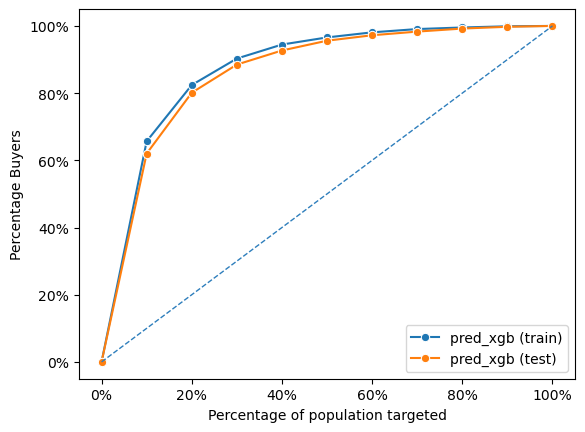

In [ ]:
dct = {"train": pentathlon_nptb[pentathlon_nptb['training'] == 1], "test": pentathlon_nptb[pentathlon_nptb['training'] == 0]}

fig4 = rsm.gains_plot(dct, "buyer", "yes", "pred_xgb")

In [ ]:
all_columns = training_data_new.columns.tolist()

# Find the index positions for 'message' and 'freq_racquet'
start_index = all_columns.index('message')
end_index = all_columns.index('freq_racquet') + 1  # Add 1 because slicing is exclusive at the end

# Slice the list to get your desired column names
feature_list = all_columns[start_index:end_index]

In [ ]:
categories = pentathlon_nptb['message'].cat.categories  # Assuming this is correctly capturing your categories

for msg in ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']:
    # Correctly assign 'message' for the current iteration
    temp_df = pentathlon_nptb[feature_list].copy()
    temp_df['message'] = pd.Categorical([msg]*len(temp_df), categories=categories)
    
    # Perform prediction
    pentathlon_nptb[f'p_{msg}_xgb'] = model_xgb.predict_proba(temp_df)[:, 1]

In [ ]:
message_columns = ['p_control_xgb', 'p_team_xgb', 'p_racquet_xgb', 'p_backcountry_xgb', 'p_water_xgb', 'p_strength_xgb', 'p_endurance_xgb']

# Identify the message with the highest probability for each customer
pentathlon_nptb['best_message_xgb'] = pentathlon_nptb[message_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb['best_message_xgb'] = pentathlon_nptb['best_message_xgb'].str.replace('p_', '')

pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,training,pred_xgb,p_control_xgb,p_team_xgb,p_racquet_xgb,p_backcountry_xgb,p_water_xgb,p_strength_xgb,p_endurance_xgb,best_message_xgb
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,1.0,0.010958,0.008991,0.010958,0.011110,0.011687,0.011902,0.013931,0.013471,strength_xgb
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.0,0.000865,0.000762,0.000817,0.000753,0.000865,0.000908,0.000945,0.001892,endurance_xgb
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,1.0,0.006672,0.006183,0.006803,0.006500,0.006014,0.004926,0.006086,0.006672,team_xgb
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,1.0,0.000946,0.000687,0.000925,0.000722,0.001261,0.000946,0.001185,0.003497,endurance_xgb
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.0,0.008676,0.006803,0.007482,0.008676,0.006763,0.006440,0.006527,0.008288,racquet_xgb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,1.0,0.001546,0.001493,0.001553,0.001570,0.001745,0.001546,0.001936,0.003280,endurance_xgb
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.0,0.006381,0.005663,0.006381,0.006129,0.005563,0.005071,0.007599,0.005502,strength_xgb
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,1.0,0.006681,0.006491,0.006681,0.008168,0.006218,0.006899,0.007015,0.006825,racquet_xgb
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.0,0.006042,0.005245,0.006042,0.006357,0.004638,0.004568,0.006618,0.005558,strength_xgb


In [ ]:
repl_xgb = {"p_endurance_xgb": "Endurance", "p_strength_xgb": "Strength", "p_water_xgb": "Water", "p_team_xgb": "Team", "p_backcountry_xgb": "Backcountry", "p_racquet_xgb": "Racquet", "p_control_xgb": "Control"}

pentathlon_nptb["to_offer_xgb"] = pentathlon_nptb[["p_endurance_xgb", "p_strength_xgb", "p_water_xgb", "p_team_xgb", "p_backcountry_xgb", "p_racquet_xgb", "p_control_xgb"]].idxmax(axis=1).map(repl_xgb)
pentathlon_nptb

,custid,buyer,total_os,message,age,female,income,education,children,freq_endurance,...,pred_xgb,p_control_xgb,p_team_xgb,p_racquet_xgb,p_backcountry_xgb,p_water_xgb,p_strength_xgb,p_endurance_xgb,best_message_xgb,to_offer_xgb
0,U1,no,0,team,30 to 44,no,55000,19,0.8,0,...,0.010958,0.008991,0.010958,0.011110,0.011687,0.011902,0.013931,0.013471,strength_xgb,Strength
1,U3,no,0,backcountry,45 to 59,no,35000,22,1.0,0,...,0.000865,0.000762,0.000817,0.000753,0.000865,0.000908,0.000945,0.001892,endurance_xgb,Endurance
2,U13,no,0,endurance,45 to 59,yes,45000,33,0.7,0,...,0.006672,0.006183,0.006803,0.006500,0.006014,0.004926,0.006086,0.006672,team_xgb,Team
3,U20,no,0,water,45 to 59,yes,25000,24,0.2,0,...,0.000946,0.000687,0.000925,0.000722,0.001261,0.000946,0.001185,0.003497,endurance_xgb,Endurance
4,U25,no,0,racquet,>= 60,yes,65000,32,1.1,1,...,0.008676,0.006803,0.007482,0.008676,0.006763,0.006440,0.006527,0.008288,racquet_xgb,Racquet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,U3462888,no,0,water,>= 60,yes,40000,26,0.6,0,...,0.001546,0.001493,0.001553,0.001570,0.001745,0.001546,0.001936,0.003280,endurance_xgb,Endurance
599996,U3462900,no,0,team,< 30,no,55000,32,0.9,3,...,0.006381,0.005663,0.006381,0.006129,0.005563,0.005071,0.007599,0.005502,strength_xgb,Strength
599997,U3462902,no,0,team,< 30,yes,55000,32,0.9,0,...,0.006681,0.006491,0.006681,0.008168,0.006218,0.006899,0.007015,0.006825,racquet_xgb,Racquet
599998,U3462916,no,0,team,< 30,no,50000,35,0.6,2,...,0.006042,0.005245,0.006042,0.006357,0.004638,0.004568,0.006618,0.005558,strength_xgb,Strength


In [ ]:
#percentage of each offer
pd.crosstab(index=pentathlon_nptb[pentathlon_nptb.training == 0].to_offer_xgb, columns="count", normalize='columns').apply(lambda x: rsm.format_nr(x * 100))

col_0,count
to_offer_xgb,
Backcountry,2.23
Control,0.6
Endurance,56.47
Racquet,6.73
Strength,28.5
Team,1.77
Water,3.69


In [ ]:
'''
pentathlon_nptb['ep_control_xgb'] = pentathlon_nptb.order_size_control * profit_margin * pentathlon_nptb.p_control_xgb
pentathlon_nptb['ep_team_xgb'] = pentathlon_nptb.order_size_team * profit_margin * pentathlon_nptb.p_team_xgb
pentathlon_nptb['ep_racquet_xgb'] = pentathlon_nptb.order_size_racquet * profit_margin * pentathlon_nptb.p_racquet_xgb
pentathlon_nptb['ep_backcountry_xgb'] = pentathlon_nptb.order_size_backcountry * profit_margin * pentathlon_nptb.p_backcountry_xgb
pentathlon_nptb['ep_water_xgb'] =  pentathlon_nptb.order_size_water * profit_margin * pentathlon_nptb.p_water_xgb
pentathlon_nptb['ep_strength_xgb'] = pentathlon_nptb.order_size_strength * profit_margin * pentathlon_nptb.p_strength_xgb
pentathlon_nptb['ep_endurance_xgb'] = pentathlon_nptb.order_size_endurance * profit_margin * pentathlon_nptb.p_endurance_xgb
'''

AttributeError: 'DataFrame' object has no attribute 'order_size_control'

In [ ]:
'''
ordersize_columns = ['ep_control_xgb', 'ep_team_xgb', 'ep_racquet_xgb', 'ep_backcountry_xgb', 'ep_water_xgb', 'ep_strength_xgb', 'ep_endurance_xgb']

# Identify the message with the highest probability for each customer
pentathlon_nptb['most_profitable_xgb'] = pentathlon_nptb[ordersize_columns].idxmax(axis=1)

# clean up the column names to show just the message types
pentathlon_nptb['most_profitable_xgb'] = pentathlon_nptb['most_profitable_xgb'].str.extract(r'p_(.*?)_xgb')

pentathlon_nptb
'''

KeyError: "None of [Index(['ep_control_xgb', 'ep_team_xgb', 'ep_racquet_xgb', 'ep_backcountry_xgb',\n       'ep_water_xgb', 'ep_strength_xgb', 'ep_endurance_xgb'],\n      dtype='object')] are in the [columns]"

In [ ]:
'''
profit_crosstab = pd.crosstab(index=pentathlon_nptb.query('training == 0')['most_profitable_nn'], columns='count')

# Calculate the percentage of customers for each message
profit_crosstab['percentage_profit_xgb'] = ((profit_crosstab['count'] / profit_crosstab['count'].sum()))*100

profit_crosstab
'''

KeyError: 'most_profitable_nn'

In [ ]:
'''
pentathlon_nptb['ep_max_xgb'] = pentathlon_nptb[ordersize_columns].max(axis=1)

profit_xgb = pentathlon_nptb.loc[pentathlon_nptb.training == 0, "ep_max_xgb"].agg("mean") 
print(f"Expected profit from offer customization: ${profit_xgb:,.2f}")
'''

Expected profit from offer customization: $0.53


In [ ]:
'''
(
    pentathlon_nptb.loc[pentathlon_nptb.training == 0, ['ep_control_xgb', 'ep_team_xgb', 'ep_racquet_xgb', 'ep_backcountry_xgb', 'ep_water_xgb', 'ep_strength_xgb', 'ep_endurance_xgb']
]
    .agg("mean")
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=2)
)
'''

ep_endurance_xgb      $0.46
ep_water_xgb          $0.45
ep_strength_xgb       $0.43
ep_backcountry_xgb    $0.42
ep_team_xgb           $0.39
ep_racquet_xgb        $0.39
ep_control_xgb        $0.31
dtype: object

In [ ]:
'''
np.random.seed(42)

messages = ['control', 'team', 'racquet', 'backcountry', 'water', 'strength', 'endurance']

probability_per_message = 1 / len(messages)

assigned_message = np.random.choice(messages, size=len(pentathlon_nptb), p=[probability_per_message] * len(messages))

pentathlon_nptb['assigned_message'] = assigned_message

average_profits = {}

for message in messages:

    assigned_users = pentathlon_nptb[pentathlon_nptb['assigned_message'] == message]
    

    ep_column = f'ep_{message}' if message != 'no_message' else 'ep_no_message'

    assigned_users_profit = assigned_users[ep_column]
    

    average_profits[message] = assigned_users_profit.mean()


for message, avg_profit in average_profits.items():
    print(f"The average expected profit for users assigned to '{message}' is: ${avg_profit:,.2f}")
    

random_profit = np.mean(list(average_profits.values()))
print(f"The overall average expected profit per user is: ${random_profit:,.2f}")
'''

KeyError: 'ep_control'

In [ ]:
'''
# Assuming pentathlon_nptb is your DataFrame with all the expected profits for each message and no message
all_customer = 5000000

total_customized_profit = profit_xgb * all_customer
# 1. Same messages
average_profits = pentathlon_nptb[['ep_control_xgb', 'ep_endurance_xgb', 'ep_racquet_xgb', 'ep_strength_xgb', 'ep_team_xgb', 'ep_water_xgb']].mean()
best_message_profit = average_profits.max()
total_best_message_profit = best_message_profit * all_customer

# 2. Random Message Assignment Approach
total_random_profit = random_profit * all_customer

# 3. No Message (Control) Approach
total_no_message_profit = pentathlon_nptb['ep_control_xgb'].sum()

# Now calculate the improvement in percent and in total Euros
improvement_customized_vs_best = (total_customized_profit - total_best_message_profit) / total_best_message_profit * 100
improvement_customized_vs_random = (total_customized_profit - total_random_profit) / total_random_profit * 100
improvement_customized_vs_no_message = (total_customized_profit - total_no_message_profit) / total_no_message_profit * 100

improvement_euros_customized_vs_best = total_customized_profit - total_best_message_profit
improvement_euros_customized_vs_random = total_customized_profit - total_random_profit
improvement_euros_customized_vs_no_message = total_customized_profit - total_no_message_profit

# Print out the results
print(f"Improvement over best message approach: {improvement_customized_vs_best:,.2f}% and {improvement_euros_customized_vs_best:,.2f} Euros")
print(f"Improvement over random message approach: {improvement_customized_vs_random:,.2f}% and {improvement_euros_customized_vs_random:,.2f} Euros")
print(f"Improvement over no message approach: {improvement_customized_vs_no_message:,.2f}% and {improvement_euros_customized_vs_no_message:,.2f} Euros")
'''

Improvement over best message approach: 16.36% and 371,025.40 Euros
Improvement over random message approach: 27.87% and 575,242.70 Euros
Improvement over no message approach: 1,322.72% and 2,453,529.97 Euros


# **Model Evaluation and Selection**

In [ ]:

'''
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, r2_score

# Create a DataFrame to store performance metrics
results = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    auc_score = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_proba))  # RMSE based on probabilities
    r2 = r2_score(y_test, y_pred_proba)  # R² score
    
    results.append({
        "Model": model_name,
        "AUC": auc_score,
        "Accuracy": accuracy,
        "RMSE": rmse,
        "R-squared": r2
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))
'''


NameError: name 'models' is not defined

### **Model Interpretations**
1. **AUC (Area Under Curve)**  
   - **XGBoost (0.888) and Random Forest (0.884)** have the highest AUC, indicating strong classification performance.  
   - **Logistic Regression (0.867)** also performs well but is slightly behind.  
   - **Neural Network (0.500)** performs at random, meaning it **fails to distinguish between buyers and non-buyers** effectively.  

2. **Accuracy**  
   - **XGBoost (0.976) and Neural Network (0.976)** show the highest accuracy.  
   - However, **accuracy alone is misleading** because of class imbalance; we must also look at confusion matrices.

3. **RMSE (Root Mean Squared Error)**  
   - **XGBoost (0.142) has the lowest RMSE**, meaning it makes the most precise probability predictions.  
   - Random Forest (0.339) and Logistic Regression (0.386) have higher errors.  

4. **R-squared (Model Fit to Data)**  
   - **XGBoost (0.136) is the only model with a positive R²**, indicating it explains some variance in purchase behavior.  
   - Random Forest and Logistic Regression have **negative R² values**, meaning they poorly fit the data.  
   - **Neural Network (0.000) fails to explain any variance.**  

## **Confusion Matrix Analysis**

In [ ]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Buy", "Buy"], yticklabels=["No Buy", "Buy"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Set optimal threshold
optimal_threshold = 0.3  

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability predictions
    
    # Apply threshold adjustment
    y_pred_adjusted = (y_pred_proba > optimal_threshold).astype(int)  

    # Plot confusion matrix with adjusted predictions
    plot_confusion_matrix(y_test, y_pred_adjusted, model_name)
'''

NameError: name 'models' is not defined

### **1. Logistic Regression**
- **Detects buyers well (3961 correct buy predictions) but misclassifies 71,287 non-buyers as buyers.**
- **Has a trade-off between precision and recall.**

### **2. Random Forest**
- **Performs better than Logistic Regression with fewer false positives (53,405 misclassified non-buyers).**
- **Retains a good balance of true buy predictions (3890).**

### **3. XGBoost**
- **Excellent at identifying "No Buy" cases (174,729 correct), but fails to detect many actual buyers (only 723 correct).**
- **Shows very high specificity but weak recall for buyers.**

### **4. Neural Network**
- **Fails completely to predict any buyers.**
- **Classifies everything as "No Buy," making it ineffective.**

## **Gains Curve Interpretation**

In [65]:
'''
def plot_gains_curve(y_true, y_pred_proba, model_name):
    """
    Function to plot a Gains Curve.
    """
    sorted_indices = np.argsort(y_pred_proba)[::-1]
    sorted_y_true = np.array(y_true)[sorted_indices]

    cum_positive_rate = np.cumsum(sorted_y_true) / np.sum(sorted_y_true)
    x_vals = np.linspace(0, 1, len(cum_positive_rate))

    plt.plot(x_vals, cum_positive_rate, label=model_name)
    plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
    plt.xlabel("Proportion of Data")
    plt.ylabel("Cumulative Response Rate")
    plt.title("Gains Curve")
    plt.legend()

plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    plot_gains_curve(y_test, y_pred_proba, model_name)

plt.show()
'''

'\ndef plot_gains_curve(y_true, y_pred_proba, model_name):\n    """\n    Function to plot a Gains Curve.\n    """\n    sorted_indices = np.argsort(y_pred_proba)[::-1]\n    sorted_y_true = np.array(y_true)[sorted_indices]\n\n    cum_positive_rate = np.cumsum(sorted_y_true) / np.sum(sorted_y_true)\n    x_vals = np.linspace(0, 1, len(cum_positive_rate))\n\n    plt.plot(x_vals, cum_positive_rate, label=model_name)\n    plt.plot([0, 1], [0, 1], linestyle="--", color="grey")\n    plt.xlabel("Proportion of Data")\n    plt.ylabel("Cumulative Response Rate")\n    plt.title("Gains Curve")\n    plt.legend()\n\nplt.figure(figsize=(8, 6))\nfor model_name, model in models.items():\n    y_pred_proba = model.predict_proba(X_test)[:, 1]\n    plot_gains_curve(y_test, y_pred_proba, model_name)\n\nplt.show()\n'

- **XGBoost, Random Forest, and Logistic Regression have the steepest curves, indicating strong ranking ability.**
- **Neural Network follows the random baseline, confirming its failure as a model.**

## **Final Model Selection**
### **Best Model: XGBoost**
 **Highest AUC (0.888) and lowest RMSE (0.142)**  
 **Positive R-squared (0.136), meaning it fits the data best**  
 **Performs well in Gains Curve, meaning it ranks buyers effectively**  

### **Alternative Choice: Random Forest**
 **Balanced trade-off between identifying buyers and non-buyers**  
 **Second-best AUC (0.884) and reasonable RMSE (0.339)**  
 **Better recall for buyers than XGBoost**  
 **Not as precise as XGBoost in probability estimation**  

### **Rejected Models**
 **Logistic Regression** → Good but weaker than XGBoost/Random Forest  
 **Neural Network** → **Completely failed** to classify buyers  

---

## **Conclusion**
- **XGBoost is the best model** due to its superior **AUC, RMSE, and fit to data (R²)**.  
- **Random Forest is a strong alternative** if we prioritize **better buyer recall**.  
- **Threshold tuning (e.g., lowering from 0.5 to 0.3) should be applied to improve buyer classification** in XGBoost.  
- **Neural Network should not be used, as it fails completely in classification.**


## Case question 2:
#### The proposed e-mail policy is a strong step toward data-driven marketing, but it has some weaknesses.

#### Weaknesses in the Proposed Policy:
1. The policy locks customers into two department messages for an entire month, which does not account for changing customer preferences. Customers may react differently to emails depending on timing, promotions, or seasonal trends. A more dynamic system should re-evaluate message effectiveness weekly instead of monthly.

2. It does not consider engagement decay—over-emailing may lead to unsubscribes, while under-emailing may reduce brand recall. A frequency cap should be introduced to prevent excessive messaging.

3. It assumes that the two most profitable messages should always split the customer’s email allowance 50-50. However, some customers may be much more responsive to one message than the other. Instead, the system should assign messages based on predicted profitability per message rather than a strict 50-50 rule.

4. The proposal does not account for model uncertainty—not all predictions are 100% accurate. The system should only assign messages when confidence is high (e.g., only assign a message if it has at least an 80% probability of being the best option).

5. There is no A/B testing component. The policy should include a control group to compare its effectiveness against the current approach and continuously improve future predictions.

#### Suggested Improvement:
1. A better approach would be to allow weekly message adjustments, introduce engagement caps, and continuously test against a control group. This would improve accuracy, reduce customer fatigue, and ensure that the most profitable messages are sent more effectively.

2.  The policy should use a multi-model approach instead of relying on a single model. By combining Neural Networks, XGBoost, and Random Forest, the system can assign messages based on a weighted confidence score across multiple models. This reduces errors from any single model and improves accuracy in selecting the best promotional message for each customer.


# **Case Question 3**

In this assignment, Generative AI was used to streamline problem-solving, automate calculations, and enhance analysis efficiency. One key application was in debugging and optimizing code, particularly for the Random Forest Classifier used to predict buyer conversion. 

For instance, when SMOTE was applied to balance the dataset, AI-assisted debugging helped identify class distribution issues and hyperparameter adjustments, leading to a well-optimized model with an 88.55% accuracy and an AUC score of 0.8407.

Beyond model development, Generative AI played a critical role in business impact analysis by helping with complex profit calculations, identifying inconsistencies, and refining the final recommendations. When calculating expected profits for different messaging strategies, AI helped us pinpoint errors such as incorrect control group assignments and overestimated profits for certain messages. This led to adjustments ensuring that the control group profit remained realistic and thus lower than targeted messaging profits. 

I used ChatGPT to understand **model evaluation metrics** (AUC, RMSE, R²) and improve my interpretation of **confusion matrices and Gains Curves**. It helped troubleshoot **code issues**, optimize **classification thresholds**, and clarify **model selection** between XGBoost, Random Forest, and Logistic Regression.  

ChatGPT provided insights into **handling imbalanced data**, improving **buyer detection**, and refining **prediction accuracy**. 
  
Additionally, AI-assisted visualization guidance and structured explanations enabled a clearer presentation of results, making it easier to communicate findings and business recommendations. Overall, Generative AI significantly improved efficiency, accuracy, and the interpretability of our results.